In [404]:
import Pkg 
Pkg.add("LightGraphs");
Pkg.add("SimpleWeightedGraphs");
Pkg.add("GraphPlot")
Pkg.add("SimpleWeightedGraphs")
Pkg.add("Cairo")
Pkg.add("Compose")
using LightGraphs, SimpleWeightedGraphs
using GraphPlot

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
Updating `~/.julia/environments/v1.5/Project.toml`
  [a81c6b42] + Compose v0.8.2
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


```
--- Day 7: Handy Haversacks ---

You land at the regional airport in time for your next flight. In fact, it looks like you'll even have time to grab some food: all flights are currently delayed due to issues in luggage processing.

Due to recent aviation regulations, many rules (your puzzle input) are being enforced about bags and their contents; bags must be color-coded and must contain specific quantities of other color-coded bags. Apparently, nobody responsible for these regulations considered how long they would take to enforce!

For example, consider the following rules:

light red bags contain 1 bright white bag, 2 muted yellow bags.
dark orange bags contain 3 bright white bags, 4 muted yellow bags.
bright white bags contain 1 shiny gold bag.
muted yellow bags contain 2 shiny gold bags, 9 faded blue bags.
shiny gold bags contain 1 dark olive bag, 2 vibrant plum bags.
dark olive bags contain 3 faded blue bags, 4 dotted black bags.
vibrant plum bags contain 5 faded blue bags, 6 dotted black bags.
faded blue bags contain no other bags.
dotted black bags contain no other bags.
These rules specify the required contents for 9 bag types. In this example, every faded blue bag is empty, every vibrant plum bag contains 11 bags (5 faded blue and 6 dotted black), and so on.

You have a shiny gold bag. If you wanted to carry it in at least one other bag, how many different bag colors would be valid for the outermost bag? (In other words: how many colors can, eventually, contain at least one shiny gold bag?)

In the above rules, the following options would be available to you:

A bright white bag, which can hold your shiny gold bag directly.
A muted yellow bag, which can hold your shiny gold bag directly, plus some other bags.
A dark orange bag, which can hold bright white and muted yellow bags, either of which could then hold your shiny gold bag.
A light red bag, which can hold bright white and muted yellow bags, either of which could then hold your shiny gold bag.
So, in this example, the number of bag colors that can eventually contain at least one shiny gold bag is 4.

How many bag colors can eventually contain at least one shiny gold bag? (The list of rules is quite long; make sure you get all of it.)
```

In [144]:
lines = readlines("sample.txt")

9-element Array{String,1}:
 "light red bags contain 1 bright white bag, 2 muted yellow bags."
 "dark orange bags contain 3 bright white bags, 4 muted yellow bags."
 "bright white bags contain 1 shiny gold bag."
 "muted yellow bags contain 2 shiny gold bags, 9 faded blue bags."
 "shiny gold bags contain 1 dark olive bag, 2 vibrant plum bags."
 "dark olive bags contain 3 faded blue bags, 4 dotted black bags."
 "vibrant plum bags contain 5 faded blue bags, 6 dotted black bags."
 "faded blue bags contain no other bags."
 "dotted black bags contain no other bags."

In [180]:
#lines = readlines("input.txt")
function slurp(lines)
    lhs = []
    nodes = Dict{String,Int}()
    rnodes =  Dict{Int,String}()
    edges = Dict{Tuple{Int,Int,Int},Int}()
    next = 1
    for line ∈ lines
        line = line[1:end-1] #removed period
        xs = split(line,"contain")
        le = strip(replace(xs[1],r"bag[s]" => ""))
        le_id = get(nodes,le,0)
        if le_id == 0
           nodes[le] = next
           rnodes[next] = le
           le_id = nodes[le]
           next = next + 1
        end

        ys = split(xs[2],",")
        for y ∈ ys
            if !contains(y,"no other bags")
                yw = parse(Int,(strip(y)[1]))
                y = strip(y)[2:end] # ignore weights for now)
                re = strip(replace(y,r"bag[s]?" => ""))
                #println(re)
                re_id = get(nodes,re,0) 
                #println("found $re_id for $re")
                if re_id == 0
                    nodes[re] = next
                    rnodes[next] = re
                    re_id = nodes[re]
                    next = next + 1
                end
                #println("$le_id => $re_id")
                edges[(le_id,re_id,yw)] = 0
            end
        end
    end
    (nodes,rnodes,edges)
end



slurp (generic function with 1 method)

```
A bright white bag, which can hold your shiny gold bag directly.
A muted yellow bag, which can hold your shiny gold bag directly, plus some other bags.
A dark orange bag, which can hold bright white and muted yellow bags, either of which could then hold your shiny gold bag.
A light red bag, which can hold bright white and muted yellow bags, either of which could then hold your shiny gold bag.
So, in this example, the number of bag colors that can eventually contain at least one shiny gold bag is 4.
```

In [375]:

function p1Graph(nodes,rnodes,edges)
    g = DiGraph(length(keys(nodes)))
    for (k,v) ∈ edges
       (e1,e2,w) = k
        add_edge!(g,e2,e1)
    end
    labels = []
    for i ∈ vertices(g)
       push!(labels,rnodes[i]) 
    end
    (g,labels)
end

#println(keys(nodes))
#println(nodes)
#bfs_parents(g,5)


p1Graph (generic function with 1 method)

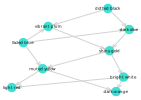

In [377]:
(nodes,rnodes,edges) = slurp(readlines("sample.txt"))
(g,labels)=p1Graph(nodes,rnodes,edges)
gplot(g,nodelabel=labels)

In [189]:
count(x -> x !=0, dfs_parents(g,nodes["shiny gold"])) - 1

4

In [409]:
(nodes,rnodes,edges) = slurp(readlines("input.txt"))
(g,labels)=p1Graph(nodes,rnodes,edges)
count(x -> x !=0, dfs_parents(g,nodes["shiny gold"])) - 1


238

In [416]:
draw(PDF("/Users/ilanpillemer/Repos/github/adventofcode2020/day7/input_normal.pdf", 200cm, 200cm), gplot(g,nodelabel=labels))

In [136]:
?dfs_parents

search: dfs_parents



```
dfs_parents(g, s[; dir=:out])
```

Perform a depth-first search of graph `g` starting from vertex `s`. Return a vector of parent vertices indexed by vertex. If `dir` is specified, use the corresponding edge direction (`:in` and `:out` are acceptable values).

### Implementation Notes

This version of DFS is iterative.


```
Your puzzle answer was 238.

The first half of this puzzle is complete! It provides one gold star: *

--- Part Two ---

It's getting pretty expensive to fly these days - not because of ticket prices, but because of the ridiculous number of bags you need to buy!

Consider again your shiny gold bag and the rules from the above example:

faded blue bags contain 0 other bags.
dotted black bags contain 0 other bags.
vibrant plum bags contain 11 other bags: 5 faded blue bags and 6 dotted black bags.
dark olive bags contain 7 other bags: 3 faded blue bags and 4 dotted black bags.
So, a single shiny gold bag must contain 1 dark olive bag (and the 7 bags within it) plus 2 vibrant plum bags (and the 11 bags within each of those): 1 + 1*7 + 2 + 2*11 = 32 bags!

Of course, the actual rules have a small chance of going several levels deeper than this example; be sure to count all of the bags, even if the nesting becomes topologically impractical!

Here's another example:

shiny gold bags contain 2 dark red bags.
dark red bags contain 2 dark orange bags.
dark orange bags contain 2 dark yellow bags.
dark yellow bags contain 2 dark green bags.
dark green bags contain 2 dark blue bags.
dark blue bags contain 2 dark violet bags.
dark violet bags contain no other bags.
In this example, a single shiny gold bag must contain 126 other bags.

How many individual bags are required inside your single shiny gold bag?
```

In [256]:
function p2Graph(nodes,rnodes,edges)
    g = SimpleWeightedDiGraph(length(keys(nodes)))
    for (k,v) ∈ edges
       (e1,e2,w) = k
        add_edge!(g,e1,e2,w)
    end
    labels = []
    for i ∈ vertices(g)
       push!(labels,rnodes[i]) 
    end
    (g,labels)
end



p2Graph (generic function with 1 method)

7 -> dark olive
4 -> dark orange
9 -> dotted black
2 -> bright white
3 -> muted yellow
5 -> shiny gold
8 -> vibrant plum
6 -> faded blue
1 -> light red

  [2, 1]  =  1.0
  [3, 1]  =  2.0
  [5, 2]  =  1.0
  [5, 3]  =  2.0
  [6, 3]  =  9.0
  [2, 4]  =  3.0
  [3, 4]  =  4.0
  [7, 5]  =  1.0
  [8, 5]  =  2.0
  [6, 7]  =  3.0
  [9, 7]  =  4.0
  [6, 8]  =  5.0
  [9, 8]  =  6.0
13


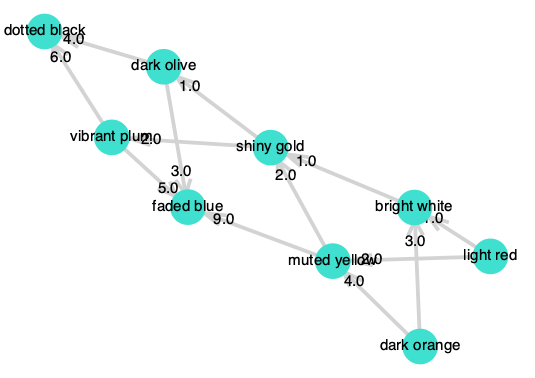

In [406]:
(nodes,rnodes,edges) = slurp(readlines("sample.txt"))
(g,labels)=p2Graph(nodes,rnodes,edges)
for (k,v) ∈ rnodes
   println("$k -> $v") 
end
println(g.weights)
println(ne(g))
edgelabel=[ 1.0,2.0,1.0,2.0,9.0,3.0,4.0,1.0,2.0,3.0,4.0,5.0,6.0]
gplot(g,nodelabel=labels,edgelabel=edgelabel)

In [407]:
using Cairo, Compose
draw(PNG("/Users/ilanpillemer/Repos/github/adventofcode2020/day7/example.png", 16cm, 16cm), gplot(g))

In [402]:
pwd()

"/Users/ilanpillemer/Repos/github/adventofcode2020/day7"

In [258]:
ys = dfs_parents(g,nodes["shiny gold"])

for i ∈ 1:length(ys)
    if ys[i] != 0
        println(rnodes[i])
    end
end

shiny gold
faded blue
dark olive
vibrant plum
dotted black


```
faded blue bags contain 0 other bags.
dotted black bags contain 0 other bags.
vibrant plum bags contain 11 other bags: 5 faded blue bags and 6 dotted black bags.
dark olive bags contain 7 other bags: 3 faded blue bags and 4 dotted black bags.
So, a single shiny gold bag must contain 1 dark olive bag (and the 7 bags within it) plus 2 vibrant plum bags (and the 11 bags within each of those): 1 + 1*7 + 2 + 2*11 = 32 bags!
```

In [263]:

ne(g)
println(rnodes[5])
println(g.weights[:,5])
println(rnodes[7])
println(g.weights[:,7])
println(rnodes[8])
println(g.weights[:,8])
println(rnodes[6])
println(g.weights[:,6])
println(rnodes[9])
println(g.weights[:,9])

shiny gold
  [7]  =  1.0
  [8]  =  2.0
dark olive
  [6]  =  3.0
  [9]  =  4.0
vibrant plum
  [6]  =  5.0
  [9]  =  6.0
faded blue
9-element SparseVector{Float64,Int64} with 0 stored entries
dotted black
9-element SparseVector{Float64,Int64} with 0 stored entries


In [277]:
outneighbors(g,5)

2-element view(::Array{Int64,1}, 8:9) with eltype Int64:
 7
 8

In [373]:
(nodes,rnodes,edges) = slurp(readlines("sample.txt"))
(g,labels)=p2Graph(nodes,rnodes,edges)
function bags_inside(g,n,total)
    acc = outneighbors(g,n)
    if length(acc) == 0
       return (1,:done)
    end
    ttotal=0
    for e ∈ acc
        (bags,state) = bags_inside(g,e,total)
        if (state != :done)
            ttotal = ttotal + g.weights[e,n]
        end
        ttotal = ttotal + (g.weights[e,n] * bags)
    end
    return (ttotal,:more)
end
bags_inside(g,5,0)

(32.0, :more)

In [370]:
(nodes,rnodes,edges) = slurp(readlines("sample.txt"))
(g,labels)=p2Graph(nodes,rnodes,edges)
bags_inside(g,nodes["shiny gold"],0)

(32.0, :more)

In [371]:
(nodes,rnodes,edges) = slurp(readlines("sample2.txt"))
(g,labels)=p2Graph(nodes,rnodes,edges)
bags_inside(g,nodes["shiny gold"],0)

(126.0, :more)

In [372]:
(nodes,rnodes,edges) = slurp(readlines("input.txt"))
(g,labels)=p2Graph(nodes,rnodes,edges)
bags_inside(g,nodes["shiny gold"],0)

(82930.0, :more)

In [415]:
using Cairo, Compose
draw(PNG("/Users/ilanpillemer/Repos/github/adventofcode2020/day7/input.png", 200cm, 200cm), gplot(g,nodelabel=labels))
draw(PDF("/Users/ilanpillemer/Repos/github/adventofcode2020/day7/input.pdf", 200cm, 200cm), gplot(g,nodelabel=labels))

In [391]:
?gplot

search: gplot gplothtml GraphPlot



Given a graph and two vectors of X and Y coordinates, returns a Compose tree of the graph layout

**Arguments**

`G` Graph to draw

`layout` Optional. Layout algorithm. Currently can be one of [`random_layout`, `circular_layout`, `spring_layout`, `shell_layout`, `stressmajorize_layout`, `spectral_layout`]. Default: `spring_layout`

`locs_x, locs_y` Locations of the nodes. Can be any units you want, but will be normalized and centered anyway

`NODESIZE` Optional. Max size for the nodes. Default: `3.0/sqrt(N)`

`nodesize` Optional. Relative size for the nodes, can be a Vector. Default: `1.0`

`nodelabel` Optional. Labels for the vertices, a Vector or nothing. Default: `nothing`

`nodelabelc` Optional. Color for the node labels, can be a Vector. Default: `colorant"black"`

`nodelabeldist` Optional. Distances for the node labels from center of nodes. Default: `0.0`

`nodelabelangleoffset` Optional. Angle offset for the node labels. Default: `π/4.0`

`NODELABELSIZE` Optional. Largest fontsize for the vertice labels. Default: `4.0`

`nodelabelsize` Optional. Relative fontsize for the vertice labels, can be a Vector. Default: `1.0`

`nodefillc` Optional. Color to fill the nodes with, can be a Vector. Default: `colorant"turquoise"`

`nodestrokec` Optional. Color for the nodes stroke, can be a Vector. Default: `nothing`

`nodestrokelw` Optional. Line width for the nodes stroke, can be a Vector. Default: `0.0`

`edgelabel` Optional. Labels for the edges, a Vector or nothing. Default: `[]`

`edgelabelc` Optional. Color for the edge labels, can be a Vector. Default: `colorant"black"`

`edgelabeldistx, edgelabeldisty` Optional. Distance for the edge label from center of edge. Default: `0.0`

`EDGELABELSIZE` Optional. Largest fontsize for the edge labels. Default: `4.0`

`edgelabelsize` Optional. Relative fontsize for the edge labels, can be a Vector. Default: `1.0`

`EDGELINEWIDTH` Optional. Max line width for the edges. Default: `0.25/sqrt(N)`

`edgelinewidth` Optional. Relative line width for the edges, can be a Vector. Default: `1.0`

`edgestrokec` Optional. Color for the edge strokes, can be a Vector. Default: `colorant"lightgray"`

`arrowlengthfrac` Optional. Fraction of line length to use for arrows. Equal to 0 for undirected graphs. Default: `0.1` for the directed graphs

`arrowangleoffset` Optional. Angular width in radians for the arrows. Default: `π/9 (20 degrees)`
